<div align="center" style="background: linear-gradient(135deg, #1e3c72, #2a5298);
            padding: 40px;
            border-radius: 15px;
            color: white;
            text-align: center;
            box-shadow: 0px 4px 12px rgba(0,0,0,0.2);">

  <h2 style="margin:0; color:transparent;">⠀</h2> <!-- blank text -->
  <h1 style="margin-bottom:10px;">🎓 Husyen Ali Alhabsy</h1>
  <h3 style="margin:5px 0;">🚀 Student Development Initiative</h3>
  <h3 style="margin:5px 0;">🤝 IBM X Hacktiv8</h3>
  <h4 style="margin-top:10px; font-weight:normal;">
    📊 Form Pengumpulan Capstone Project Data Analytics Program 💡
  </h4>
    <hr style="width:50%; border:1.5px solid white; margin:15px auto;">

</div>


In [1]:
# Install Dependencies
# Granite & LangChain
!pip install -q replicate
!pip install -q langchain-community
!pip install -q langchain-experimental

# Visualisasi
!pip install -q seaborn
!pip install -q matplotlib
!pip install -q statsmodels

print("All Dependencies installed. Status: Complete")

All Dependencies installed. Status: Complete


In [2]:
# Import & Cek Data
from google.colab import files
import pandas as pd

uploaded = files.upload()  # Pilih WA_Fn-UseC_-HR-Employee-Attrition.csv
csv_file = "WA_Fn-UseC_-HR-Employee-Attrition.csv"

# Load dataset ke Pandas DataFrame
df = pd.read_csv(csv_file)
print(f"Dataset '{csv_file}' berhasil dimuat. Jumlah baris: {len(df)}")

df.head()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv
Dataset 'WA_Fn-UseC_-HR-Employee-Attrition.csv' berhasil dimuat. Jumlah baris: 1470


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Eksplorasi Data (EDA)
# Distribusi attrition
attrition_dist = df['Attrition'].value_counts(normalize=True)*100
print("Distribusi Attrition (%):\n", attrition_dist)

# Statistik deskriptif
print(df.describe())

Distribusi Attrition (%):
 Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean    

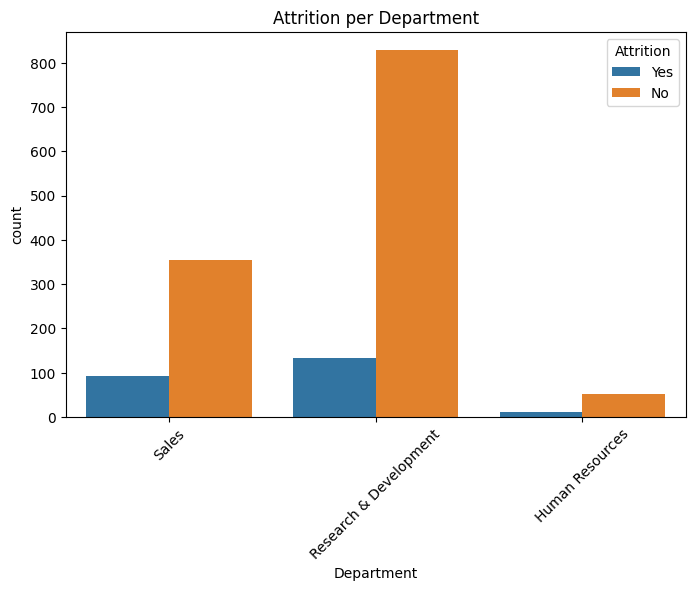

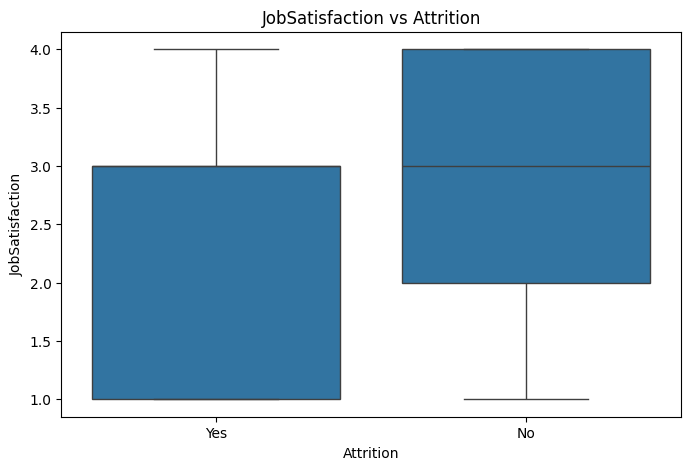

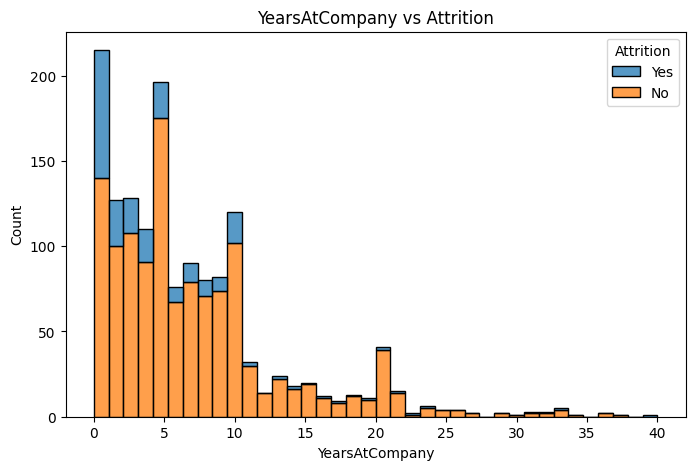

In [4]:
# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Attrition per department
plt.figure(figsize=(8,5))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition per Department")
plt.xticks(rotation=45)
plt.show()

# JobSatisfaction vs Attrition
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title("JobSatisfaction vs Attrition")
plt.show()

# YearsAtCompany vs Attrition
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack')
plt.title("YearsAtCompany vs Attrition")
plt.show()

In [5]:
# Model Prediksi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Encode variabel kategorikal
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline: scaling + logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # skala fitur
    ('logreg', LogisticRegression(
        max_iter=5000,              # iterasi lebih banyak
        solver='lbfgs',             # tetap lbfgs, tapi bisa juga 'saga'
        class_weight='balanced'     # opsional: lebih sensitif ke minoritas
    ))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.75      0.84       247
           1       0.37      0.77      0.50        47

    accuracy                           0.76       294
   macro avg       0.66      0.76      0.67       294
weighted avg       0.85      0.76      0.78       294



In [15]:
# Before and After Encode Coloumn Attrition
print(df[['Attrition']].head())
print(df_encoded[['Attrition']].head())

   Attrition
0          1
1          0
2          1
3          0
4          0
   Attrition
0          1
1          0
2          1
3          0
4          0


In [6]:
#Granite API
!pip install -q replicate langchain-community langchain-experimental
from langchain_community.llms import Replicate
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from google.colab import userdata
import os


# Ambil Granite API token yang sudah tersimpan di Colab secrets
api_token = userdata.get("api_token")
os.environ["REPLICATE_API_TOKEN"] = api_token


# Membuat Granite Agent untuk berinteraksi dengan DataFrame
agent = create_pandas_dataframe_agent(
    llm=Replicate(model="ibm-granite/granite-3.3-8b-instruct"),
    df=df,
    verbose=True,               # Menampilkan proses agent
    allow_dangerous_code=True,  # Mengizinkan Granite mengeksekusi kode Python
)


print("Granite Agent is ready for data analysis.")

Granite Agent is ready for data analysis.




> Entering new AgentExecutor chain...
Thought: To address the given tasks, I will perform the following steps:

1. Calculate descriptive statistics for Age, YearsAtCompany, MonthlyIncome, and JobSatisfaction.
2. Identify outliers in numerical variables using the Interquartile Range (IQR) method.
3. Analyze the distribution of employees by Department and JobRole using value counts and potentially visualizations.

Action: python_repl_ast

Action Input:
```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Given that df is already loaded

# 1. Descriptive Statistics
descriptive_stats = df[['Age', 'YearsAtCompany', 'MonthlyIncome', 'JobSatisfaction']].describe()
print("Descriptive Statistics:\n", descriptive_stats)

# 2. Outlier Detection
Q1 = df[['Age', 'YearsAtCompany', 'MonthlyIncome', 'JobSatisfaction']].quantile(0.25)
Q3 = df[['Age', 'YearsAtCompany', 'MonthlyIncome', 'JobSatisfaction']].quantile(0.75)
IQR = Q3 - Q1

outliers = df[

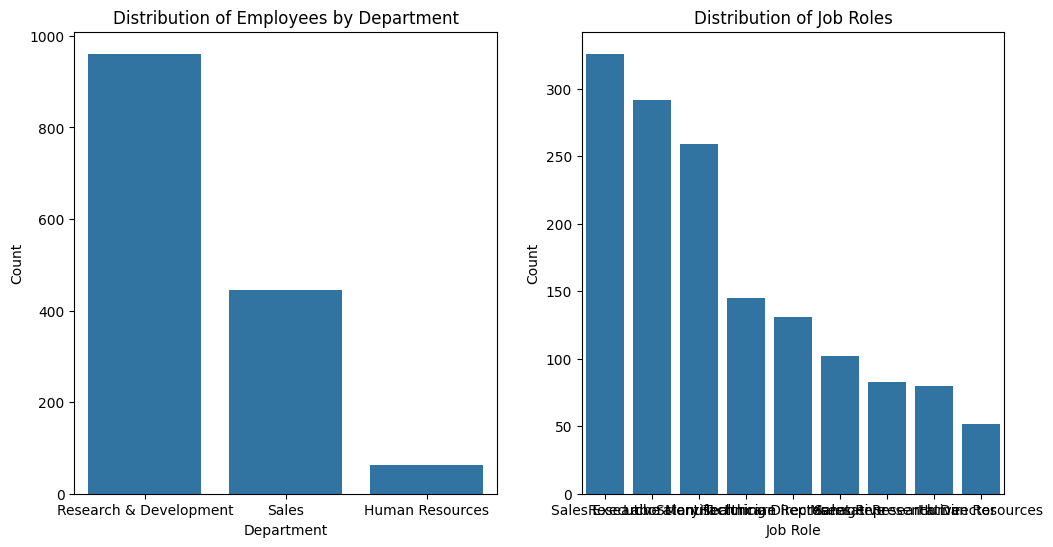

In [7]:
# Prompt Analytical Result
prompt_analytical = """
Buatlah 'Analytical Result' dari dataset ini dengan bahasa formal dan profesional:
1. Ringkasan statistik deskriptif (Age, YearsAtCompany, MonthlyIncome, JobSatisfaction)
2. Deteksi outlier pada variabel numerik
3. Distribusi karyawan berdasarkan Department dan JobRole
"""
analytical_result = agent.invoke({"input": prompt_analytical})

print("\n=== Analytical Result (Granite) ===\n")
print(analytical_result)

In [8]:
# Insight & Findings
attrition_rate = df['Attrition'].value_counts(normalize=True).get('Yes',0)
avg_job_satisfaction = df['JobSatisfaction'].mean()
avg_performance = df['PerformanceRating'].mean()

prompt_insight_ready = f"""
Buat 5–7 insight actionable untuk HR berdasarkan data berikut:

Attrition rate: {attrition_rate:.2%}
Average JobSatisfaction: {avg_job_satisfaction:.2f}
Average PerformanceRating: {avg_performance:.2f}
"""

insight_findings = agent.invoke({"input": prompt_insight_ready})
print(insight_findings)




> Entering new AgentExecutor chain...
Thought: To provide actionable insights for HR, I need to analyze the data in the dataframe `df`. I will focus on columns that could potentially influence attrition, job satisfaction, and performance ratings. Key columns to consider include `Attrition`, `JobSatisfaction`, `PerformanceRating`, `Age`, `BusinessTravel`, `DailyRate`, `DistanceFromHome`, `Education`, `EducationField`, `JobRole`, `MaritalStatus`, and `MonthlyIncome`. 

Action: python_repl_ast

Action Input: 
```python
# Calculate attrition rate
attrition_rate = df['Attrition'].mean() * 100

# Calculate average job satisfaction
avg_job_satisfaction = df['JobSatisfaction'].mean()

# Calculate average performance rating
avg_performance_rating = df['PerformanceRating'].mean()

attrition_rate, avg_job_satisfaction, avg_performance_rating
```
TypeError: Could not convert string 'YesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoYes

In [11]:
# Reccomendation
attrition_rate = df['Attrition'].value_counts(normalize=True).get('Yes', 0)
avg_job_satisfaction = df['JobSatisfaction'].mean()
avg_performance = df['PerformanceRating'].mean()
attrition_breakdown = df[df['Attrition'] == 'Yes'].groupby(['Department','Gender']).size().to_dict()

prompt_recommendation = f"""
Buat bagian 'Recommendations' untuk dataset HR IBM ini.
Berikan strategi HR berbasis data untuk mengurangi attrition dan meningkatkan kinerja karyawan.
Gunakan data berikut sebagai referensi:

- Attrition rate: {attrition_rate:.2%}
- Rata-rata Job Satisfaction: {avg_job_satisfaction:.2f}
- Rata-rata Performance Rating: {avg_performance:.2f}
- Attrition breakdown by Department & Gender: {attrition_breakdown}
"""

recommendations = agent.invoke({"input": prompt_recommendation}, handle_parsing_errors=True)

print("\n=== Recommendations ===\n")
print(recommendations)



> Entering new AgentExecutor chain...
Thought: To provide recommendations for HR strategy based on the data, I need to first understand the attrition breakdown by Department and Gender. This information is not provided directly in the question, so I'll use the python_repl_ast tool to analyze the dataframe `df` and calculate the attrition breakdown by Department and Gender.

Action: python_repl_ast

Action Input:
```python
attrition_breakdown = df[df['Attrition'] == 'Yes'].groupby(['Department', 'Gender']).size().reset_index(name='Attrition_Count')
attrition_breakdown
```
KeyError: 'Gender'It seems there's an error because the 'Gender' column does not exist in the dataframe. I need to correct this before proceeding. Let me adjust the code to use 'Gender_Male' and 'Gender_Female' columns assuming they are present in the dataframe.

Action: python_repl_ast

Action Input:
```python
attrition_breakdown = df[df['Attrition'] == 'Yes'].groupby(['Department', 'Gender_Male', 'Gender_Female']).

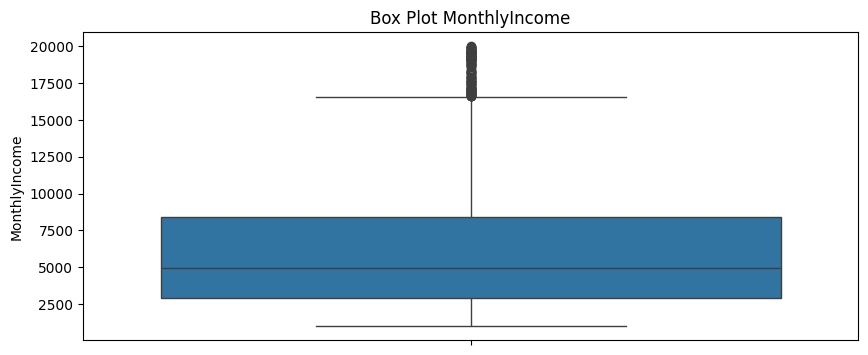

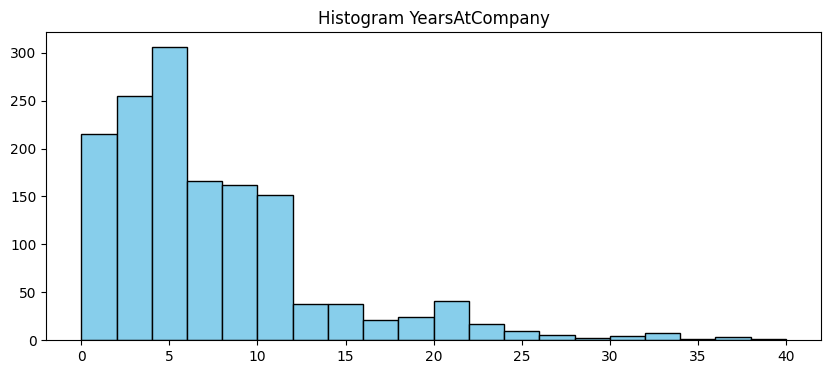

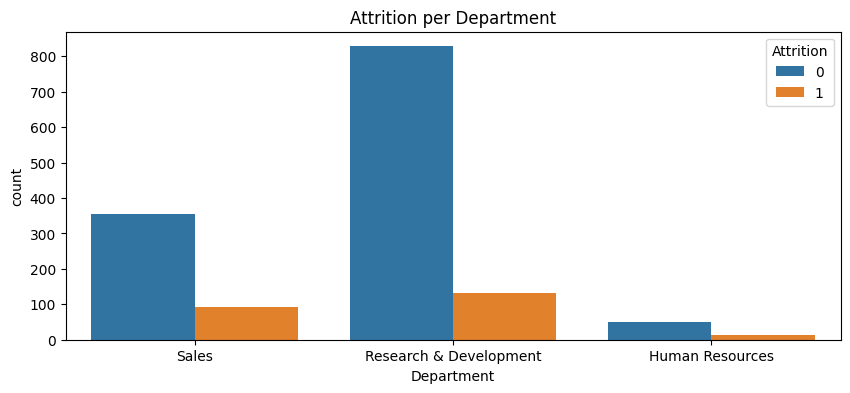

<Figure size 1000x400 with 0 Axes>

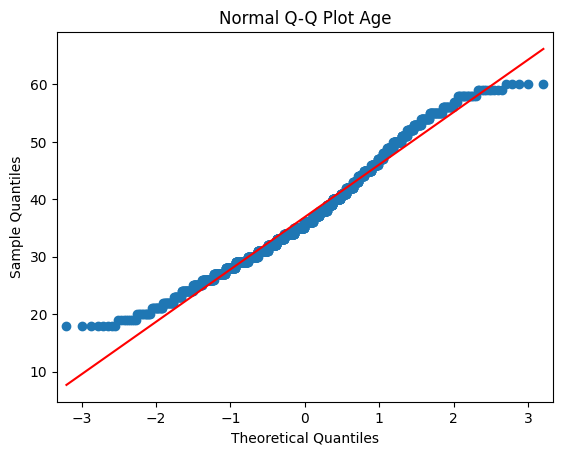

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Boxplot MonthlyIncome
plt.figure(figsize=(10,4))
sns.boxplot(df['MonthlyIncome'])
plt.title("Box Plot MonthlyIncome")
plt.show()

# Histogram YearsAtCompany
plt.figure(figsize=(10,4))
plt.hist(df['YearsAtCompany'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram YearsAtCompany")
plt.show()

# Attrition per Department (Bar Plot)
plt.figure(figsize=(10,4))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition per Department")
plt.show()

# Q-Q Plot Age
plt.figure(figsize=(10,4))
qqplot(df['Age'], line='s')
plt.title("Normal Q-Q Plot Age")
plt.show()